# Project VI - Solution of Initial Value Problems

---

**Students:** Chloë Geller, Zachary Crandall, Carlos Fuentes, Jessica Quiroz Galvez, Austin Wauters

MAP 4384\
Professor Borges

---

In [39]:
# All libraries will be imported in this cell
import time
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve as fs
from tabulate import tabulate as table

In [40]:
global x0, steps, gamma, omega

Consider the initial-value-problem:

$$
\begin{align*}
x^{''}(t)+2\gamma x^{'}+\omega^{2} x(t)=0 \\
x(0)=x_0 \\ 
x^{'}(0)=\gamma x_0
\end{align*}
$$

with $0 < \gamma < \omega$. It's solution is given by
$$x(t)=x_0 e^{-\gamma t} \cos(\beta t)$$

where $\beta = \sqrt{\omega^{2}-\gamma^{2}}$. This equation can be written as a first order system, with $x^{'}=y$, and $y^{'}=-2\gamma y - \omega^2 x$.

## Your task

### Explicit Midpoint

Implement the Explicit Midpoint method (EMP) doing
$$\frac{x_{n+1}−x_{n−1}}{2h}=y_n\\
\frac{y_{n+1}−y_{n−1}}{2h}=−2\gamma y_n− \omega^2x_n $$

### Implicit Midpoint

Implement the Implicit Midpoint method (IMP) doing
$$ \frac{x_{n+1}−x_n}{h}=\frac{y_{n+1}+y_n}{2}\\
\frac{y_{n+1}−y_n}{h}=−2\gamma \frac{y_{n+1}+y_n}{2}−\omega^2\frac{x_{n+1}+x_n}{2}$$

### Non-Standard Implicit Midpoint

Implement the Non-standard Implicit Midpoint method (NSIMP) doing
$$\frac{x_{n+1}−e^{−\gamma h}x_n}{h}=\frac{y_{n+1}+e^{−\gamma h}y_n}{2}\\
\frac{y_{n+1}−e^{−\gamma h}y_n}{h}=−\omega^2\frac{x_{n+1}+e^{−\gamma h}x_n}{2}$$

 - All three methods are second order and they do not differ much in terms of computational cost; demonstrate this numerically.  I expect several table with the results.

 - For $\gamma=0$  the  implicit  methods  are  equivalent,  and  we  expect  they  are  superior  to  the explicit method; check this numerically using long time simulations with varioush, $\omega$, $x_0$.

- Experiment on the long-time accuracy of the methods for small values of $\gamma>0$.

- Run experiments to help you fully understand what happens to the approximations as $\gamma$ increases.

- If there is, in fact, a ’breaking point’ for any method as $\gamma$ increases determine what it is and how it depends upon $h$ or $\omega$.

## Introduction

insert introduction here

## Midpoint Methods

insert text here

### Explicit Midpoint Method

insert text here

In [41]:
def mid_point():    
    y = np.zeros(steps+1)
    xl = np.zeros(steps+1)
    
    xp0 = x0 * gamma
    
    xl[0] = x0
    y[0] = xp0
    
    for i in range(0, steps):
        if i == 0:
            xl[i+1] = 2 * h * y[i]
            y[i+1] = -4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
        else:
            xl[i+1] = xl[i-1] + 2*  h * y[i]
            y[i+1] = y[i-1] - 4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
    return xl


### Implicit Midpoint Method

insert text here

In [42]:
def IMP(p):
    X, Y = p
    
    deriv = np.array([0., 0.])
    deriv[0] = (Y + x_imp[1]) / 2 - (X - x_imp[0]) / h
    deriv[1] = -2 * gamma * (Y + x_imp[1]) / 2 - omega**2 * (X + x_imp[0]) / 2 - (Y - x_imp[1]) / h
    
    return deriv

def implicit_mid_point():    
    global x_imp
    x_imp = np.array([x0, xp0])
    traj = x_imp

    for i in range(1, steps+1):
        x_new = fs(IMP, x_imp) 
        traj = np.vstack([traj, x_new])
        x_imp = x_new
    
    return traj


### Non-Standard Implicit Midpoint Method

insert text here

In [43]:
def NSIMP(p):
    X, Y = p
    deriv = np.array([0., 0.])
    deriv[0] = (Y + np.exp(-gamma * h) * x_nsimp[1]) / 2 - (X - np.exp(-gamma * h) * x_nsimp[0]) / h
    deriv[1] = -omega**2 * (X + np.exp(-gamma * h) * x_nsimp[0]) / 2 - (Y - np.exp(-gamma * h) * x_nsimp[1]) / h
    
    return deriv

def ns_implicit_mid(): 
    global x_nsimp
    x_nsimp = np.array([x0, xp0])
    traj = x_nsimp

    for i in range(1, steps+1):
        x_new = fs(NSIMP, x_nsimp) 
        traj = np.vstack([traj, x_new])
        x_nsimp = x_new
    
    return traj

## Numerical Results

insert text here

#### Examples
 to attach a plot you can do this:
 
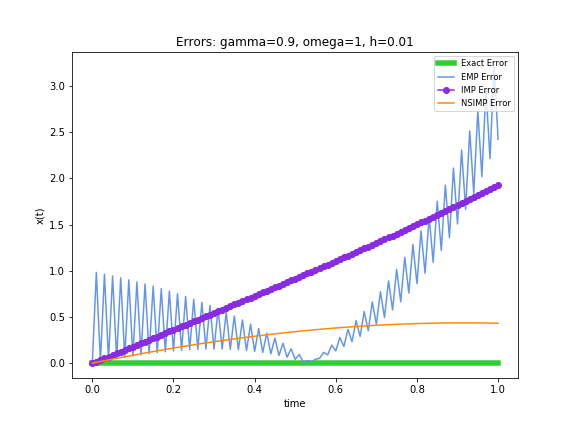\
 **Figure 1**: insert caption here
 
 instructions here: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html look for Markdown Attachments
 for making the tables: https://tableconvert.com/

In [44]:
def exact():
    y = np.zeros(steps+1)
    b = np.sqrt((omega**2) - (gamma**2))
    
    for i in range(0, (steps+1)):
        y[i] = x0 * np.exp(-gamma * t[i]) * np.cos(b * t[i])
    return y

def relative_error(exact, approx, steps):
    rel = np.zeros((steps+1,))
    
    for i in range(0, steps+1):
        rel[i] = abs(exact[i] - approx[i]) / abs(exact[i])
        
    return rel

In [45]:
def results(t, x_m, x_i, x_n, err1, err2, err3, x_ex):
    return list(zip(range(x_m.shape[0]), t, x_m, x_i, x_n, err1, err2, err3, x_ex))

In [46]:
def main():
    start = time.time()
    global t0, h, xp0, t

    t0 = 0
    tf = 1
    h = (tf - t0) / steps
    xp0 = x0 * gamma
    t = np.arange(t0, tf + h, h)

    x_m = mid_point()
    x_i = implicit_mid_point()
    x_n = ns_implicit_mid()
    x_ex = exact()

    error_mid = relative_error(x_ex, x_m, steps)
    error_imp = relative_error(x_ex, x_i[:,0], steps)
    error_nsimp = relative_error(x_ex, x_n[:,0], steps)
    error_exact = relative_error(x_ex, x_ex, steps)
    
    title1 = "Exact solution and methods: gamma=" + str(gamma) + ", omega=" + str(omega) + ", h=" + str(h)
    plt.figure(figsize=(8, 6))
    plt.plot(t, x_ex, "limegreen", label="Exact Solution", linewidth=5.5)
    plt.plot(t, x_m, "cornflowerblue", label="EMP")
    plt.plot(t, x_i[:,0], "blueviolet", marker="o", label="IMP")
    plt.plot(t, x_n[:,0], "darkorange", label="NSIMP")
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title(title1)
    plt.legend(loc="upper right", fontsize="small")
    plt.savefig("./plots/"+title1+".png")
    plt.show()
    
    title2 = "Errors: gamma=" + str(gamma) + ", omega=" + str(omega) + ", h=" + str(h)
    plt.figure(figsize=(8,6))
    plt.plot(t, error_exact, "limegreen", label="Exact Error", linewidth=5.5)
    plt.plot(t, error_mid, "cornflowerblue", label="EMP Error")
    plt.plot(t, error_imp, "blueviolet", marker="o", label="IMP Error")
    plt.plot(t, error_nsimp, "darkorange", label="NSIMP Error")
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title(title2)
    plt.legend(loc="upper right", fontsize="small")
    plt.savefig("./plots/"+title2+".png")
    plt.show()
    

    print()
    print(f"Testing using: steps = {steps}, x0 = {x0}, gamma = {gamma}, omega = {omega}, and h = {h}.", end="\n\n\n\n")
    table_results = results(t, x_m, x_i[:,0], x_n[:,0], error_mid, error_imp, error_nsimp, x_ex)
    print(table(table_results, headers=["n", "t", "EMP", "IMP", "NSIMP", "EMP Error", "IMP Error", "NSIMP Error", "Exact Solution"]))
    print()
    print()
    
    print("Time to run: ", time.time() - start)
    
    return

In [47]:
##### THIS IS FOR BULLET POINT 2 #####
def gamma_0():
    global t0, h, xp0, t
    t0 = 0
    tf = 1
    h = (tf - t0) / steps
    xp0 = x0 * gamma
    t = np.arange(t0, tf + h, h)


    x_i = implicit_mid_point()
    x_n = ns_implicit_mid()
    x_ex = exact()


    error_imp = relative_error(x_ex, x_i[:,0], steps)
    error_nsimp = relative_error(x_ex, x_n[:,0], steps)
    error_exact = relative_error(x_ex, x_ex, steps)

    title1 = "Exact solution and methods: gamma=" + str(gamma) + ", omega=" + str(omega) + ", h=" + str(h)
    plt.figure(figsize=(8,5))
    plt.plot(t, x_i[:,0], "navy", label="IMP", linewidth=8)
    plt.plot(t, x_n[:,0], "deeppink", label="NSIMP",linewidth=3)
    plt.plot(t, x_ex, "limegreen", marker='o', label="Exact Solution", linewidth=0.5)
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title(title1)
    plt.legend(loc="lower left", fontsize="small")
    plt.savefig("./plots/"+title1+".png")
    plt.show()

    title2 = "Errors: gamma=" + str(gamma) + ", omega=" + str(omega) + ", h=" + str(h)
    plt.figure(figsize=(8, 5))
    plt.plot(t, error_imp, "navy", label="IMP", linewidth=6)
    plt.plot(t, error_nsimp, "deeppink", label="NSIMP",linewidth=2)
    plt.plot(t, error_exact, "limegreen", marker='o', label="Exact Solution", linewidth=0.5)
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title(title2)
    plt.legend(loc="upper right", fontsize="small")
    plt.savefig("./plots/"+title2+".png")
    plt.show()
    
    return

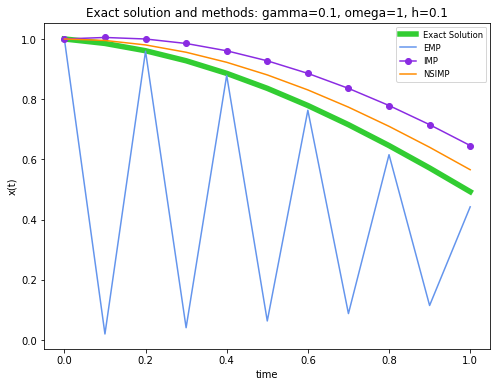

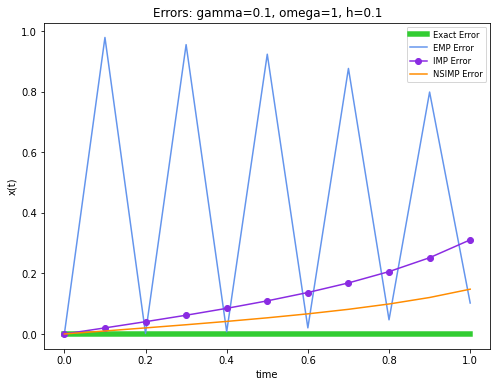


Testing using: steps = 10, x0 = 1, gamma = 0.1, omega = 1, and h = 0.1.



  n    t        EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ---  ---------  --------  --------  -----------  -----------  -------------  ----------------
  0  0    1          1         1          0             0             0                   1
  1  0.1  0.02       1.00494   0.994988   0.979699      0.0200833     0.00998282          0.985153
  2  0.2  0.9592     0.999854  0.98015    0.00172211    0.0405878     0.0200813           0.960855
  3  0.3  0.040832   0.984994  0.955829   0.955978      0.0619517     0.0305077           0.927532
  4  0.4  0.879199   0.9607    0.922456   0.00733363    0.0846864     0.0415059           0.885694
  5  0.5  0.0632308  0.927398  0.880542   0.924358      0.10943       0.0533769           0.835923
  6  0.6  0.763134   0.885594  0.830674   0.0202012     0.137027      0.0665156           0.778868
  7  0.7  0.0877429  0.835868  0.773509 

In [48]:
# These are our initial values
steps = 10
x0 = 1
gamma = 0.1
omega = 1

main()

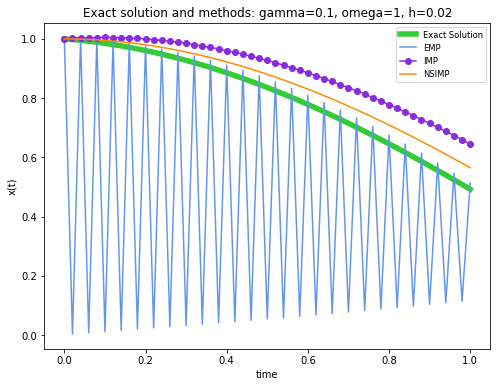

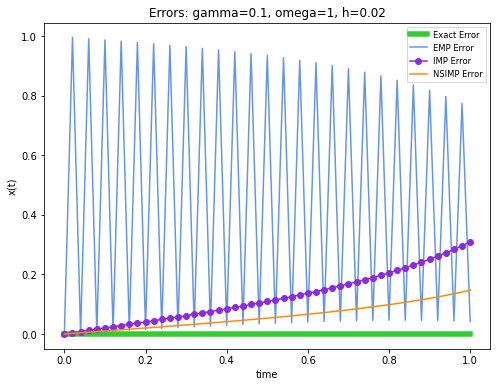


Testing using: steps = 50, x0 = 1, gamma = 0.1, omega = 1, and h = 0.02.



  n     t         EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1           1         1          0            0              0                   1
  1  0.02  0.004       1.0018    0.999798   0.995991     0.00400061     0.00199821          0.997804
  2  0.04  0.998368    1.00319   0.999194   0.00316387   0.00800442     0.00399402          0.995219
  3  0.06  0.00800666  1.00417   0.99819    0.991931     0.0120146      0.005989            0.992247
  4  0.08  0.995107    1.00475   0.996787   0.00628557   0.0160344      0.00798473          0.988891
  5  0.1   0.0120266   1.00492   0.994988   0.987792     0.0200669      0.0099828           0.985153
  6  0.12  0.990221    1.0047    0.992795   0.0093612    0.0241156      0.0119848           0.981037
  7  0.14  0.0160664 

In [49]:
# This one is to show what happens when we increase the steps
steps = 50
x0 = 1
gamma = 0.1
omega = 1
main()

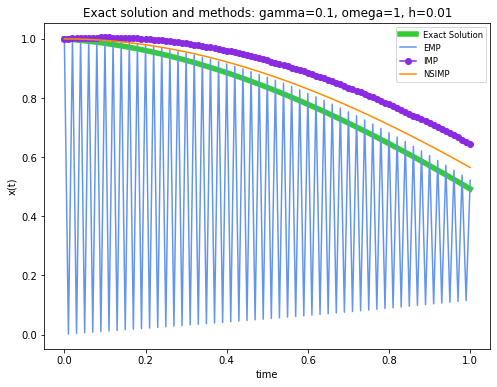

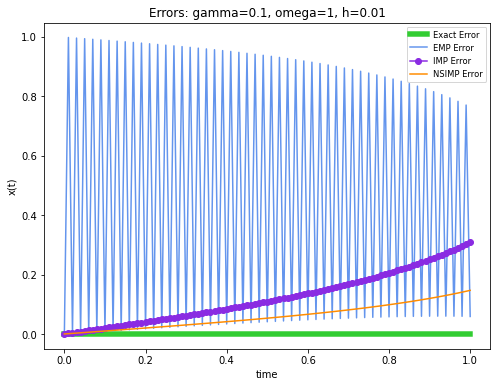


Testing using: steps = 100, x0 = 1, gamma = 0.1, omega = 1, and h = 0.01.



  n     t         EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1           1         1          0            0             0                    1
  1  0.01  0.002       1.00095   0.99995    0.997998     0.00200008    0.000999525          0.998951
  2  0.02  0.999592    1.0018    0.999798   0.00179153   0.00400055    0.00199825           0.997804
  3  0.03  0.00400083  1.00254   0.999546   0.995985     0.00600182    0.00299637           0.99656
  4  0.04  0.998776    1.00319   0.999194   0.00357399   0.00800427    0.00399408           0.995219
  5  0.05  0.00600333  1.00373   0.998742   0.993959     0.0100083     0.00499158           0.993781
  6  0.06  0.997553    1.00417   0.99819    0.0053471    0.0120144     0.00598906           0.992247
  7  0.07  0.00800831

In [50]:
# This one is to show what happens when we increase the steps

steps = 100
x0 = 1
gamma = 0.1
omega = 1
main()

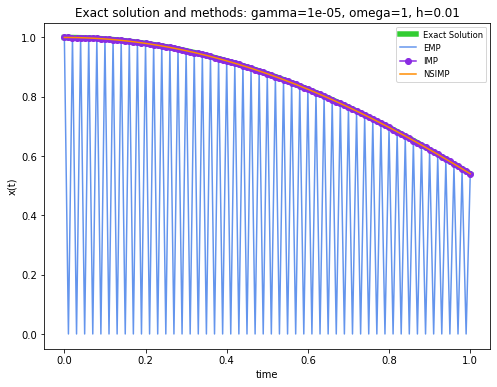

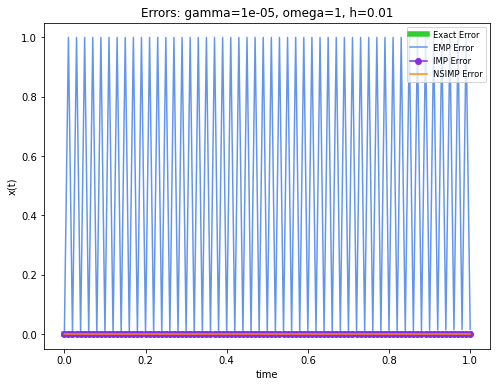


Testing using: steps = 100, x0 = 1, gamma = 1e-05, omega = 1, and h = 0.01.



  n     t          EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  -----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1            1         1         0            0              0                    1
  1  0.01  2e-07        0.99995   0.99995   1            2.00841e-07    1.00836e-07          0.99995
  2  0.02  0.9996       0.9998    0.9998    0.000199847  4.03389e-07    2.03359e-07          0.9998
  3  0.03  4.0008e-07   0.99955   0.99955   1            6.07685e-07    3.0759e-07           0.99955
  4  0.04  0.9988       0.999201  0.9992    0.000399867  8.1377e-07     4.1355e-07           0.9992
  5  0.05  6.0032e-07   0.998751  0.99875   0.999999     1.02169e-06    5.21263e-07          0.99875
  6  0.06  0.997601     0.998201  0.998201  0.000600222  1.23148e-06    6.30751e-07          0.9982
  7  0.07  8.00799

In [51]:
# This is to show what happens when we decrease gamma
steps = 100
x0 = 1
gamma = 1e-5
omega = 1
main()

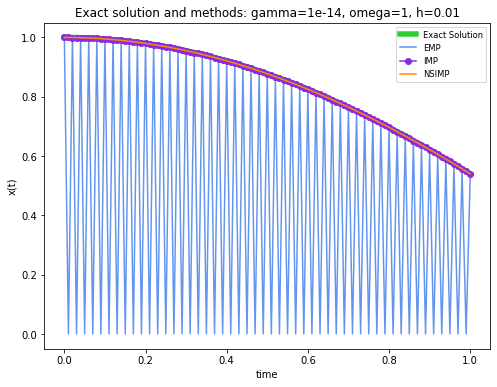

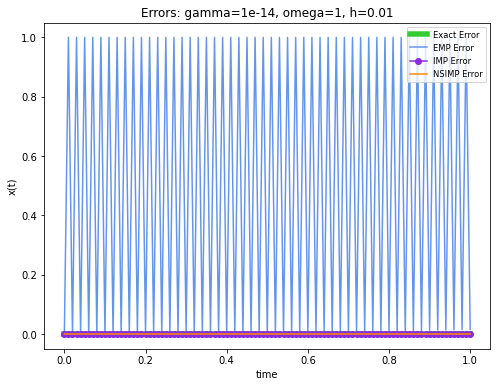


Testing using: steps = 100, x0 = 1, gamma = 1e-14, omega = 1, and h = 0.01.



  n     t          EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  -----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1            1         1         0            0              0                    1
  1  0.01  2e-16        0.99995   0.99995   1            8.33345e-10    8.33345e-10          0.99995
  2  0.02  0.9996       0.9998    0.9998    0.000200047  3.33371e-09    3.33371e-09          0.9998
  3  0.03  4.0008e-16   0.99955   0.99955   1            7.50211e-09    7.50211e-09          0.99955
  4  0.04  0.9988       0.9992    0.9992    0.000400267  1.33402e-08    1.33402e-08          0.9992
  5  0.05  6.0032e-16   0.99875   0.99875   1            2.08503e-08    2.08503e-08          0.99875
  6  0.06  0.997601     0.998201  0.998201  0.000600821  3.00355e-08    3.00355e-08          0.998201
  7  0.07  8.007

In [52]:
# This is to show what happens when we decrease gamma
steps = 100
x0 = 1
gamma = 1e-14
omega = 1
main()

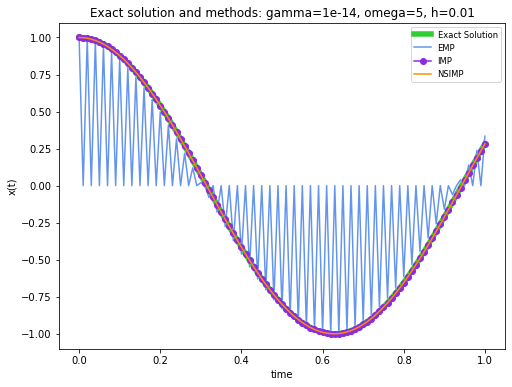

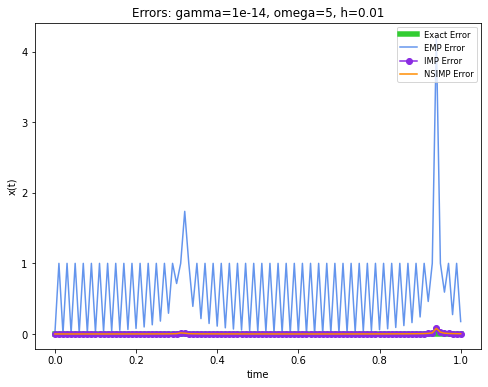


Testing using: steps = 100, x0 = 1, gamma = 1e-14, omega = 5, and h = 0.01.



  n     t           EMP         IMP       NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ------------  ----------  ----------  -----------  -----------  -------------  ----------------
  0  0      1             1           1           0           0              0                   1
  1  0.01   2e-16         0.998751    0.998751    1           5.21018e-07    5.21018e-07         0.99875
  2  0.02   0.99          0.995006    0.995006    0.00502929  2.08931e-06    2.08931e-06         0.995004
  3  0.03   4.02e-16      0.988776    0.988776    1           4.72072e-06    4.72072e-06         0.988771
  4  0.04   0.9701        0.980075    0.980075    0.0101693   8.44222e-06    8.44222e-06         0.980067
  5  0.05   6.0794e-16    0.968925    0.968925    1           1.32927e-05    1.32927e-05         0.968912
  6  0.06   0.940499      0.955355    0.955355    0.0155312   1.93243e-05    1

In [53]:
# This is to show what happens when we increase omega
steps = 100
x0 = 1
gamma = 1e-14
omega = 5
main()

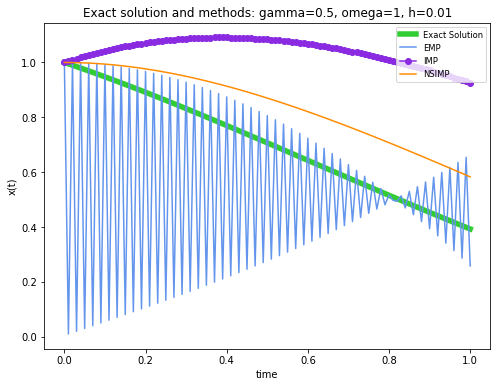

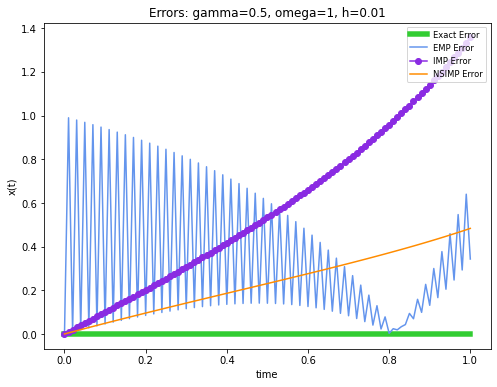


Testing using: steps = 100, x0 = 1, gamma = 0.5, omega = 1, and h = 0.01.



  n     t        EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ---------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1          1         1          0             0             0                   1
  1  0.01  0.01       1.00493   0.999938   0.989949      0.0100003     0.00498756          0.994975
  2  0.02  0.9994     1.0097    0.999752   0.00959557    0.0200022     0.00995075          0.989901
  3  0.03  0.020008   1.01433   0.999443   0.979683      0.030007      0.0148902           0.984779
  4  0.04  0.9982     1.01881   0.999013   0.0189764     0.0400164     0.0198064           0.979611
  5  0.05  0.030032   1.02315   0.998463   0.969179      0.0500317     0.0247002           0.974396
  6  0.06  0.9964     1.02734   0.997795   0.028133      0.0600546     0.0295719           0.969136
  7  0.07  0.04008    1.03138

In [54]:
# This is to show what happens when we increase gamma towards omega
steps = 100
x0 = 1
gamma = 0.5
omega = 1
main()

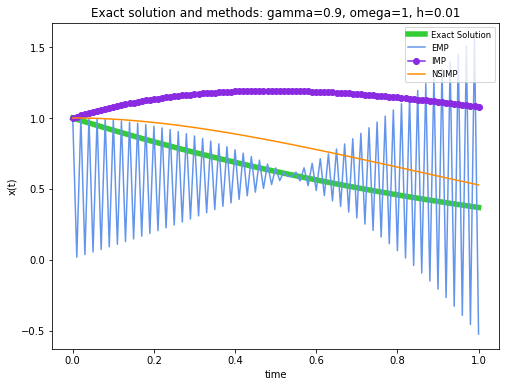

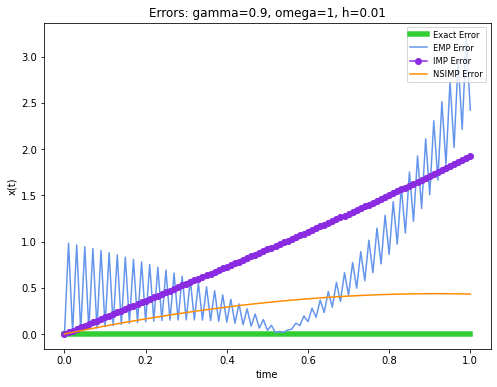


Testing using: steps = 100, x0 = 1, gamma = 0.9, omega = 1, and h = 0.01.



  n     t         EMP      IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ----------  -------  --------  -----------  -----------  -------------  ----------------
  0  0      1          1        1           0            0             0                   1
  1  0.01   0.018      1.00887  0.99991     0.981837     0.0180004     0.00895936          0.991031
  2  0.02   0.998952   1.01748  0.999642    0.0171346    0.0360015     0.0178373           0.982124
  3  0.03   0.0360305  1.02584  0.9992      0.96298      0.054004      0.0266335           0.973278
  4  0.04   0.996855   1.03395  0.998586    0.033553     0.0720086     0.0353476           0.964494
  5  0.05   0.0541221  1.0418   0.997804    0.943373     0.0900158     0.0439791           0.95577
  6  0.06   0.993709   1.04942  0.996857    0.0492029    0.108027      0.0525277           0.947108
  7  0.07   0.0723054  1.0568 

In [55]:
# This is to show what happens when we increase gamma towards omega
steps = 100
x0 = 1
gamma = 0.9
omega = 1
main()

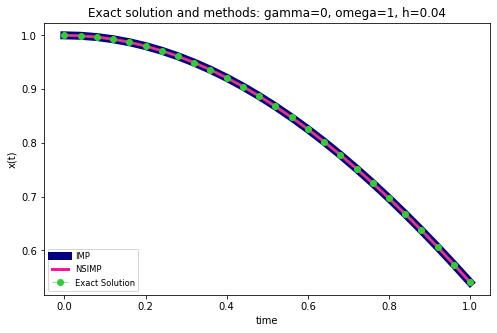

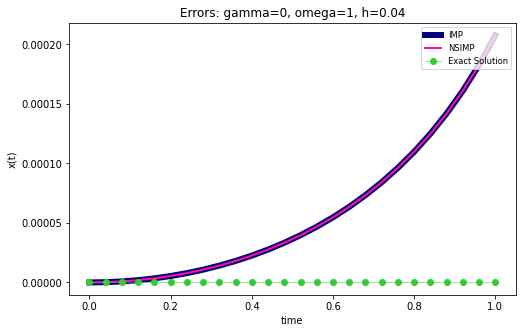

In [56]:
##### THIS IS FOR BULLET POINT 2 #####
# This is to show that IMP and NSIMP are equal when gamma = 0. When omega = 1, they are also equal to the exact solution.
# Don't need to include the error plot for this one
steps = 25
x0 = 1
gamma = 0
omega = 1

gamma_0()

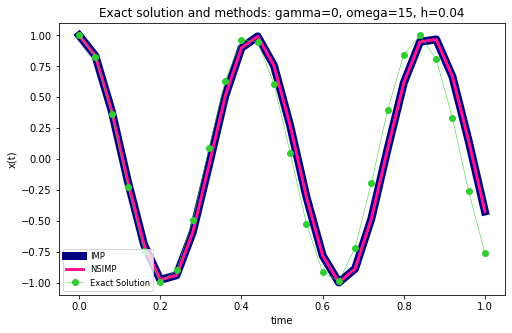

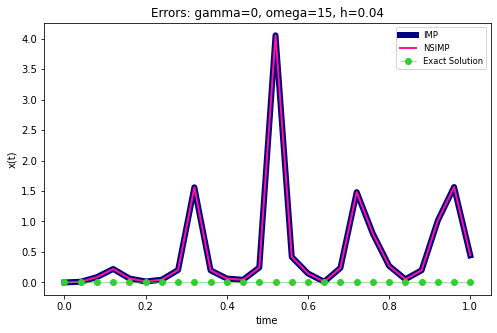

In [57]:
##### THIS IS FOR BULLET POINT 2 #####
# This is to show that IMP and NSIMP are equal when gamma = 0. When omega != 1, they no longer equal to the exact solution.
# Include the error plot for this one
steps = 25
x0 = 1
gamma = 0
omega = 15

gamma_0()

In [58]:
# This is to show a breaking point
# steps = 100
# x0 = 1
# gamma = 0.1
# omega = 3.14/2
# main()

In [59]:
#### HERE'S SOME MORE OPTIONS IF YOU WANT TO INCLUDE THEM ####
# steps = 10
# x0 = 1
# gamma = 0.00001
# omega = 1
# main()

In [60]:
# Changing gamma back to 0.1, and steps to 25: the error for EMP grew significantly (0.755411), compared to (0.102301) when steps = 10. 
# There weren't any significant changes in errors for IMP and NSIMP.
# steps = 25
# x0 = 1
# gamma = 0.1
# omega = 1
# main()

In [61]:
# steps = 25
# x0 = 1
# gamma = 0.02
# omega = 1
# main()

In [62]:
# steps = 50
# x0 = 1
# gamma = 0.0001
# omega = 1
# main()

In [63]:
# When gamma <= 1e-13, we obtain the same results for IMP and NSIMP.
# steps = 50
# x0 = 1
# gamma = 1e-13
# omega = 1
# main()

In [64]:
# steps = 50
# x0 = 1
# gamma = 1e-5
# omega = 5
# main()

In [65]:
# steps = 50
# x0 = 1
# gamma = 1e-5
# omega = 10
# main()

In [66]:
# steps = 100
# x0 = 1
# gamma = 1e-5
# omega = 1
# main()

In [67]:
# steps = 100
# x0 = 1
# gamma = 1e-14
# omega = 30
# main()

In [68]:
# steps = 100
# x0 = 1
# gamma = 1e-14
# omega = 80
# main()

In [69]:
# steps = 100
# x0 = 1
# gamma = 0.05
# omega = 1
# main()

In [70]:
# steps = 100
# x0 = 1
# gamma = 0.5
# omega = 1
# main()

In [71]:
# steps = 100
# x0 = 1
# gamma = 0.05
# omega = 8
# main()

In [72]:
# steps = 1000
# x0 = 1
# gamma = 1e-14
# omega = 4
# main()

In [73]:
# steps = 1000
# x0 = 1
# gamma = 1e-14
# omega = 20
# main()

In [74]:
# steps = 1000
# x0 = 1
# gamma = 1e-14
# omega = 600
# main()

In [75]:
# steps = 100
# x0 = 1
# gamma = 0.99
# omega = 1
# main()

In [76]:
# steps = 100
# x0 = 1
# gamma = 2
# omega = 12
# main()

In [90]:
s = [10, 25, 50, 100]
g = [10e-4, 10e-3, 10e-2, 10e-1]
o = [1, 2, 5, 10]
times = []

for steps in s:
    for gamma in g:
        for omega in o:
            list = []
            list.append(steps)
            list.append(gamma)
            list.append(omega)
            start = time.time()
            mid_point()
            list.append(time.time() - start)
            start = time.time()
            implicit_mid_point()
            list.append(time.time() - start)
            start = time.time()
            ns_implicit_mid()
            list.append(time.time() - start)
            times.append(list)
print(table(times, headers=["steps", "gamma", "omega", "EMP Time", "IMP Time", "NSIMP Time"]))

  steps    gamma    omega     EMP Time    IMP Time    NSIMP Time
-------  -------  -------  -----------  ----------  ------------
     10    0.001        1  4.98295e-05  0.00189161    0.00234914
     10    0.001        2  4.1008e-05   0.00141287    0.00189614
     10    0.001        5  4.02927e-05  0.00123692    0.00162101
     10    0.001       10  3.69549e-05  0.00123405    0.00153089
     10    0.01         1  3.71933e-05  0.0012269     0.00143695
     10    0.01         2  3.57628e-05  0.00111103    0.00150418
     10    0.01         5  4.60148e-05  0.00122523    0.00146127
     10    0.01        10  3.50475e-05  0.00114298    0.00155711
     10    0.1          1  5.126e-05    0.00111389    0.00158
     10    0.1          2  3.69549e-05  0.00110579    0.00136685
     10    0.1          5  3.50475e-05  0.00115108    0.00136709
     10    0.1         10  3.62396e-05  0.00106192    0.00168324
     10    1            1  3.93391e-05  0.00116587    0.00196505
     10    1            2  3

##Explicit midpoint breaking points:

Odd number of steps.
Due to the nature of it's oscilation the error is extreem if the finale value it the result of on odd step

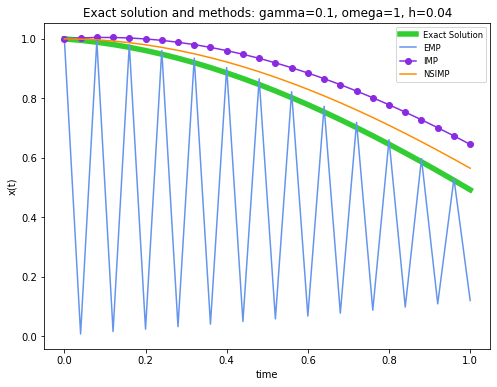

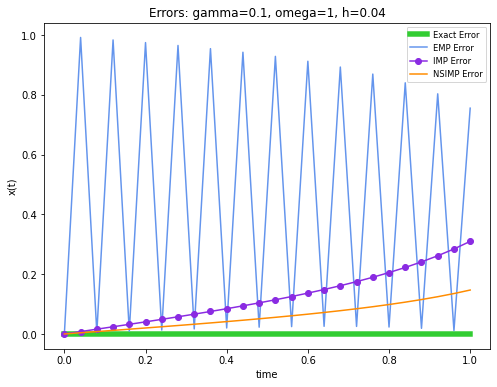


Testing using: steps = 25, x0 = 1, gamma = 0.1, omega = 1, and h = 0.04.



  n     t        EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ---------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1          1         1          0             0             0                   1
  1  0.04  0.008      1.00319   0.999194   0.991962      0.008005      0.00399378          0.995219
  2  0.08  0.993472   1.00475   0.996787   0.00463265    0.0160358     0.00798457          0.988891
  3  0.12  0.0160532  1.0047    0.992795   0.983636      0.0241183     0.011985            0.981037
  4  0.16  0.980457   1.00305   0.987238   0.00902985    0.0322788     0.0160081           0.971683
  5  0.2   0.024212   0.999812  0.980136   0.974802      0.0405447     0.020067            0.960855
  6  0.24  0.961036   0.99501   0.971514   0.0131296     0.0489449     0.0241755           0.948582
  7  0.28  0.0325265  0.988661

In [82]:
## ODD
steps = 25
x0 = 1
gamma = .1
omega = 1
main()

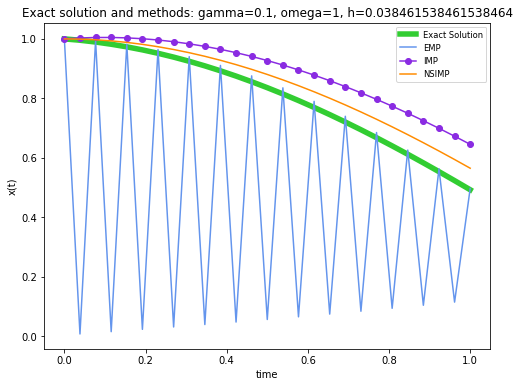

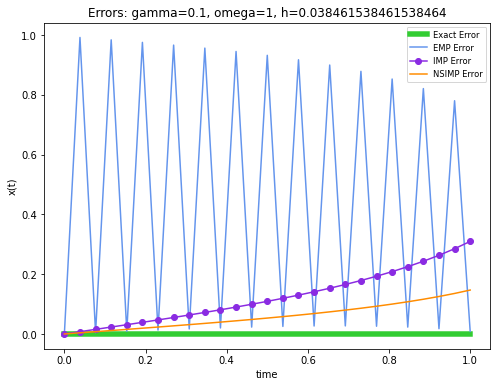


Testing using: steps = 26, x0 = 1, gamma = 0.1, omega = 1, and h = 0.038461538461538464.



  n          t         EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ---------  ----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0          1           1         1          0            0              0                   1
  1  0.0384615  0.00769231  1.00309   0.999255   0.992272     0.00769674     0.00384033          0.995432
  2  0.0769231  0.993964    1.00469   0.997028   0.00458084   0.0154165      0.00767743          0.989432
  3  0.115385   0.015432    1.00479   0.993336   0.984286     0.023182       0.0115225           0.98202
  4  0.153846   0.981928    1.0034    0.988194   0.00894964   0.0310168      0.0153871           0.973219
  5  0.192308   0.0232655   1.00056   0.98162    0.975842     0.038945       0.0192828           0.96305
  6  0.230769   0.963962    0.996256  0.973637   0.0130536    0.0469

In [83]:
## EVEN
steps = 26
x0 = 1
gamma = .1
omega = 1
main()

When using any gamma > 0, the error diverges npi/2 < omega < npi and converges npi < omega < (n+1)pi/2. At every point it starts to diverge the rate at which it diverges increases.

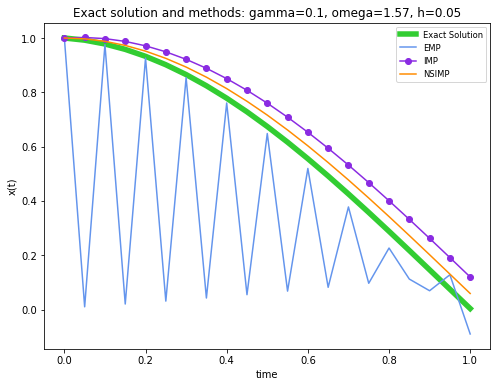

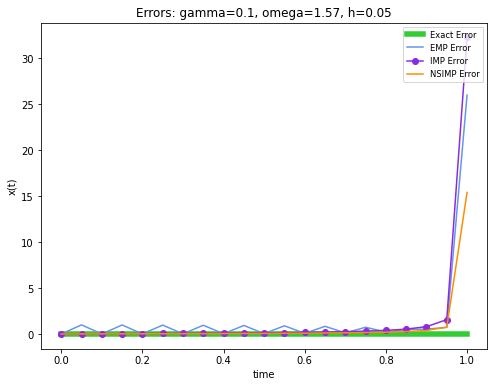


Testing using: steps = 20, x0 = 1, gamma = 0.1, omega = 1.57, and h = 0.05.



  n     t         EMP       IMP      NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ----------  --------  ---------  -----------  -----------  -------------  ----------------
  0  0      1          1         1           0             0             0                 1
  1  0.05   0.01       1.00191   0.996919    0.989919      0.0100263     0.00499831        0.991961
  2  0.1    0.975151   0.99766   0.98774     0.00283387    0.0201833     0.0100397         0.977922
  3  0.15   0.0202505  0.987348  0.972582    0.978862      0.0306017     0.0151885         0.95803
  4  0.2    0.92606    0.971093  0.951595    0.00686879    0.0414257     0.0205153         0.932465
  5  0.25   0.0309836  0.949055  0.924968    0.965629      0.0528212     0.0261005         0.90144
  6  0.3    0.853929   0.921426  0.89292     0.0130264     0.0649868     0.0320402         0.865199
  7  0.35   0.0423957  0.

In [85]:
steps = 20
x0 = 1
gamma = .1
omega = 3.14/2
main()

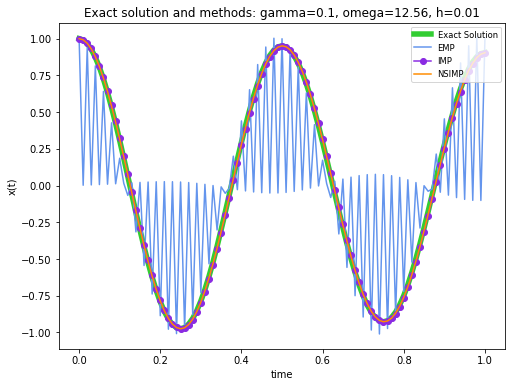

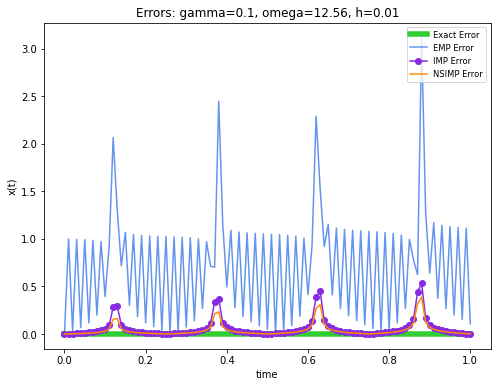


Testing using: steps = 100, x0 = 1, gamma = 0.1, omega = 12.56, and h = 0.01.



  n     t           EMP         IMP       NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ------------  ----------  ----------  -----------  -----------  -------------  ----------------
  0  0      1             1           1           0           0              0                   1
  1  0.01   0.002         0.993146    0.992147    0.997982    0.00203268     0.00102426          0.991132
  2  0.02   0.936891      0.970716    0.968734    0.0308178   0.00417342     0.00212298          0.966682
  3  0.03   0.00412623    0.933092    0.93016     0.995549    0.0065004      0.00333728          0.927066
  4  0.04   0.814653      0.880896    0.87706     0.0667686   0.00911577     0.00472215          0.872938
  5  0.05   0.00648105    0.814975    0.810299    0.991951    0.0121655      0.00635726          0.80518
  6  0.06   0.641001      0.736393    0.73095     0.115719    0.0158764     

In [88]:
## error diverging and converging
steps = 100
x0 = 1
gamma = .1
omega = 12.56
main()